## Import Libraries & Load Dataset

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

## Medical Mnist Dataset

In [2]:
image_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    validation_split = 0.2
)

In [ ]:
path = "../input/medical-mnist"
Train = image_generator.flow_from_directory(
    path,
    class_mode = "categorical",
    target_size = (64,64),
    batch_size = 32,
    color_mode = "grayscale",
    subset = "training"
    
)
Val = image_generator.flow_from_directory(
    path,
    class_mode = "categorical",
    target_size = (64,64),
    batch_size = 32,
    color_mode = "grayscale",
    subset = "validation"
    
)

# Model
## CNN

In [4]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding="same",activation="relu",input_shape=(64,64,1)))
model.add(MaxPool2D())
model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6,activation="softmax"))

2022-03-28 09:40:51.564963: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               8388864   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

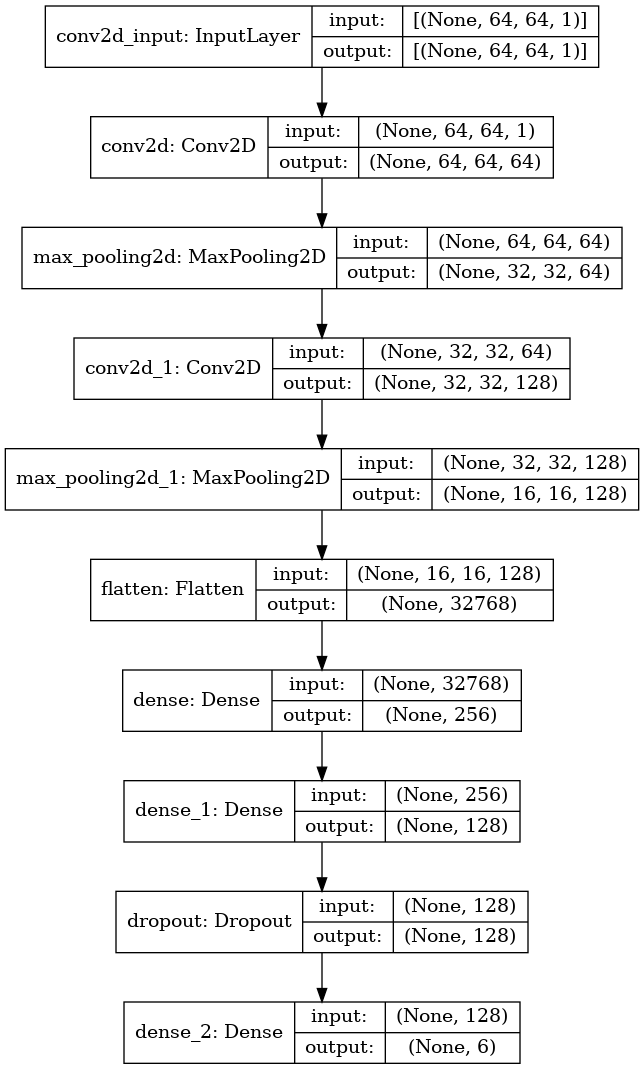

In [7]:
plot_model(model,show_shapes=True)

In [8]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("MedicalMnist.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [9]:
history = model.fit(Train,
                   epochs=20,
                   validation_data=Val,
                   callbacks=[checkpoint])

2022-03-28 09:41:19.455195: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1474/1474 [==============================] - 362s 245ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0055 - val_accuracy: 0.9984
Epoch 2/20
1474/1474 [==============================] - 339s 230ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0043 - val_accuracy: 0.9980
Epoch 3/20
1474/1474 [==============================] - 339s 230ms/step - loss: 0.0085 - accuracy: 0.9978 - val_loss: 0.0022 - val_accuracy: 0.9992
Epoch 4/20
1474/1474 [==============================] - 340s 230ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0138 - val_accuracy: 0.9979
Epoch 5/20
1474/1474 [==============================] - 340s 230ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 6/20
1474/1474 [==============================] - 340s 230ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0172 - val_accuracy: 0.9976
Epoch 7/20
1474/1474 [==============================] - 341s 231ms/step - loss: 0.0075 - accuracy: 0.9986 - val_

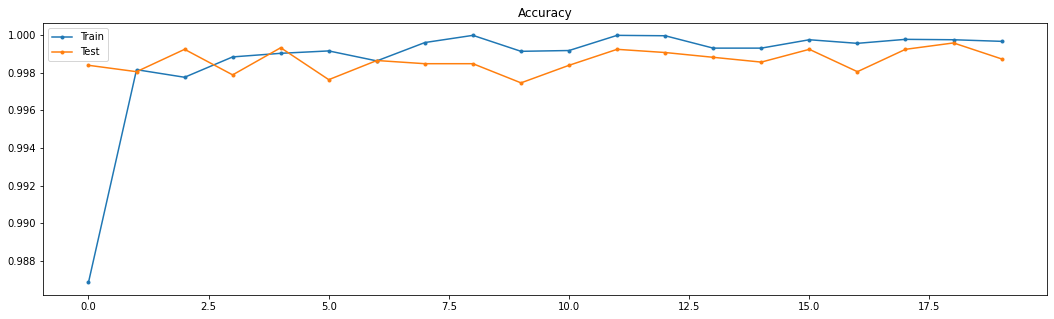

In [11]:
plt.figure(figsize=(18,5))
plt.title("Accuracy")
plt.plot(history.history["accuracy"],label="Train",marker=".")
plt.plot(history.history["val_accuracy"],label="Test",marker=".")
plt.legend()
plt.show()